In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
credit_df = pd.read_csv('C:\\Users\\skattige.ONE\\Desktop\\Final Case Study\\4. CREDIT CARD CASE STUDY - SEGMENTATION\\CC GENERAL.csv',sep=',')

In [4]:
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit_df.info() # checking the dtypes of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
credit_df.isnull().sum()# checking the null values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
#deriving the columns 
credit_df['MONTHLY_AVG_PURCHASE'] = credit_df['PURCHASES']/credit_df['TENURE']
credit_df['MONTHLY_AVG_CASH_ADVANCE'] = credit_df['CASH_ADVANCE']/credit_df['TENURE']
credit_df['PURCHASE_TYPE_OFF_PAY'] = np.where(credit_df['ONEOFF_PURCHASES']>0,1,0)
credit_df['PURCHASE_TYPE_INSTALLMENT'] = np.where(credit_df['INSTALLMENTS_PURCHASES']>0,1,0)
credit_df['LIMIT_USAGE'] = np.where(credit_df['CREDIT_LIMIT']== 0, 0,credit_df['BALANCE']/credit_df['CREDIT_LIMIT'])
credit_df['PAYMENT_RATIO'] = np.where(credit_df['MINIMUM_PAYMENTS']== 0, 0, credit_df['PAYMENTS']/credit_df['MINIMUM_PAYMENTS'])
#credit_df['No.of.Purchase'] = credit_df['PURCHASES']/credit_df['PURCHASES_TRX']

In [8]:
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
MONTHLY_AVG_PURCHASE                  0
MONTHLY_AVG_CASH_ADVANCE              0
PURCHASE_TYPE_OFF_PAY                 0
PURCHASE_TYPE_INSTALLMENT             0
LIMIT_USAGE                           1
PAYMENT_RATIO                       313
dtype: int64

In [9]:
credit_df.fillna(0,inplace=True)

In [10]:
credit_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
MONTHLY_AVG_PURCHASE                0
MONTHLY_AVG_CASH_ADVANCE            0
PURCHASE_TYPE_OFF_PAY               0
PURCHASE_TYPE_INSTALLMENT           0
LIMIT_USAGE                         0
PAYMENT_RATIO                       0
dtype: int64

In [11]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,PURCHASE_TYPE_OFF_PAY,PURCHASE_TYPE_INSTALLMENT,LIMIT_USAGE,PAYMENT_RATIO
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,...,1733.143852,833.983453,0.153715,11.517318,86.175173,88.977984,0.519330,0.562458,0.388883,9.023079
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,...,2895.063757,2335.989918,0.292499,1.338331,180.508787,193.136115,0.499654,0.496111,0.389722,118.177101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,383.276166,163.028164,0.000000,12.000000,3.399375,0.000000,0.000000,0.000000,0.041494,0.902729
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,856.901546,289.628402,0.000000,12.000000,31.936667,0.000000,1.000000,1.000000,0.302720,2.011999
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,1.000000,1.000000,0.717571,6.027054
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,1.000000,1.000000,15.909951,6840.528861


In [12]:
credit_df.drop(['CUST_ID'],axis=1,inplace=True)

In [13]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT           

In [14]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=credit_df.apply(lambda x: var_summary(x)).T

In [15]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.0,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.138560
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.0,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.0,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.570000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.0,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.250000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.0,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.000000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.211760
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.0,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.0,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.500000


In [16]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

credit_df=credit_df.apply(lambda x: outlier_capping(x))

In [17]:
num_summary=credit_df.apply(lambda x: var_summary(x)).T

In [18]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.379237e+07,1541.046707,873.385231,1966.597484,3.867506e+06,0.065101,0.065248,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9337.094398,9338.804814
BALANCE_FREQUENCY,8950.0,0.0,7.858846e+03,0.878083,1.000000,0.234032,5.477084e-02,0.090909,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.379252e+06,936.229237,361.280000,1525.185179,2.326190e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8961.796200,8977.290000
ONEOFF_PURCHASES,8950.0,0.0,4.801619e+06,536.493774,38.000000,1096.913512,1.203219e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6684.195482,6689.898200
INSTALLMENTS_PURCHASES,8950.0,0.0,3.441260e+06,384.498368,89.000000,676.271068,4.573426e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3885.853155,3886.240500
CASH_ADVANCE,8950.0,0.0,8.376493e+06,935.920972,0.000000,1775.774147,3.153374e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9584.005151,9588.163357
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.199449e+03,0.134017,0.000000,0.195550,3.823977e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,0.833333


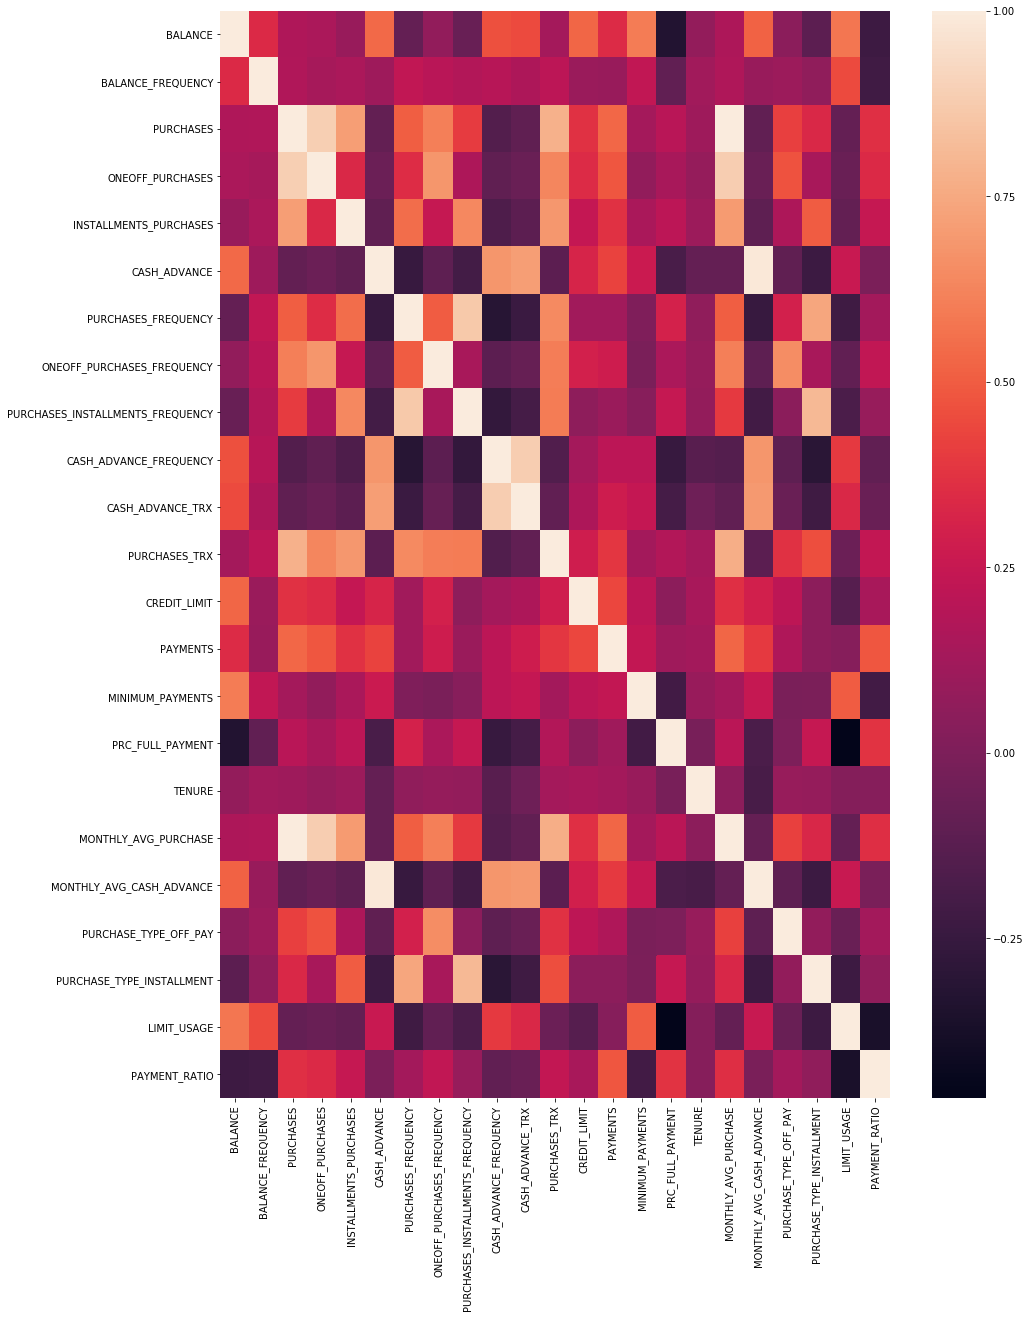

In [19]:
plt.rcParams['figure.figsize'] = 15, 20
plt.rcParams['axes.grid'] = True

sns.heatmap(credit_df.corr())

In [20]:
pandas_profiling.ProfileReport(credit_df)

Number of variables,23
Number of observations,8950
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,184.0 B
Numeric,21
Categorical,0
Date,0
Text (Unique),0
Rejected,2
Distinct count,8772


In [35]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT                    8950 non-null float64
TENURE                              8950 non-null float64
MONTHLY_AVG_PURCHASE                8950 non-null float64
MONTHLY_AVG_CASH_ADVANCE            8950 non-null float64
PURCHASE_TYPE_OFF_PAY               8950 non-null float64
PURCHASE_TYPE_INSTALLME

In [36]:
# Standardize the data

from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()
credit_scaled = sc.fit_transform(credit_df)

 

In [38]:
#applying the PCA 

from sklearn.decomposition import PCA
pc = PCA(n_components=18)
pc.fit(credit_scaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
var = np.cumsum(np.round(pc.explained_variance_ratio_,decimals=4)*100)

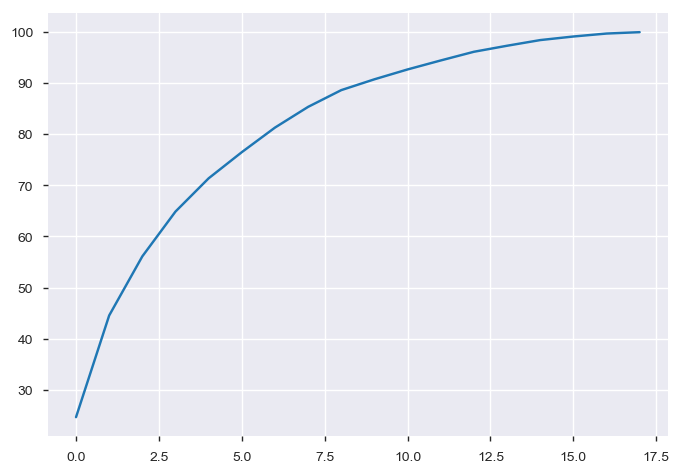

In [40]:
plt.plot(var)

In [41]:
var

array([  24.62,   44.53,   56.11,   64.88,   71.39,   76.51,   81.32,
         85.38,   88.66,   90.78,   92.71,   94.47,   96.17,   97.35,
         98.46,   99.16,   99.74,  100.01])

In [42]:
pc_final = PCA(n_components=10).fit(credit_scaled)
reduced_cr = pc_final.fit_transform(credit_scaled)

In [43]:
pd.DataFrame(reduced_cr).head()

,0,1,2,3,4,5,6,7,8,9
0,-0.463151,-2.291172,-0.390122,0.243575,-0.584820,-0.162997,-0.283330,0.369061,-0.390493,-0.185019
1,2.859932,0.342393,1.370259,0.705174,-1.121068,0.012542,-0.091474,-0.877804,-0.409418,0.922820
2,-0.675530,0.974558,-0.199585,-2.756611,0.718227,0.295856,-0.963281,-0.738978,-0.023420,-0.185567
3,0.385376,-1.037622,0.812054,-1.721644,-0.436701,0.813653,-1.127508,0.136418,-0.112573,-0.450199
4,0.659287,-1.530205,-0.398831,-1.940803,0.157719,-0.656206,0.490466,0.016366,-0.193023,0.751222


In [34]:
credit_df.drop(['ONEOFF_PURCHASES','PURCHASES_TRX','INSTALLMENTS_PURCHASES'],axis=1,inplace=True)

In [33]:
df = credit_df.corr()
df.to_csv('variables.csv')

In [44]:
col_list = credit_df.columns

In [ ]:
#Loadings = pd.DataFrame((pc_final.components_.T*np.sqrt(pc_final.explained_variance_)))

In [45]:
from sklearn.cluster import KMeans

In [46]:
km_3 = KMeans(n_clusters=3,random_state=123)
km_3.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [47]:
pd.Series(km_3.labels_).value_counts()

0    4070
2    3541
1    1339
dtype: int64

In [48]:
km_4 = KMeans(n_clusters=4,random_state=123).fit(reduced_cr)
km_5 = KMeans(n_clusters=5,random_state=123).fit(reduced_cr)
km_6 = KMeans(n_clusters=6,random_state=123).fit(reduced_cr)
km_7 = KMeans(n_clusters=7,random_state=123).fit(reduced_cr)
km_8 = KMeans(n_clusters=8,random_state=123).fit(reduced_cr)

In [49]:
km_4.labels_

array([2, 3, 0, ..., 2, 1, 1])

In [50]:
credit_df['cluster_3'] = km_3.labels_
credit_df['cluster_4'] = km_4.labels_
credit_df['cluster_5'] = km_5.labels_
credit_df['cluster_6'] = km_6.labels_
credit_df['cluster_7'] = km_7.labels_
credit_df['cluster_8'] = km_8.labels_

In [51]:
credit_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,...,PURCHASE_TYPE_OFF_PAY,PURCHASE_TYPE_INSTALLMENT,LIMIT_USAGE,PAYMENT_RATIO,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,0.166667,0.000000,0.083333,0.000000,0.0,1000.0,201.802084,139.509787,...,0.0,1.0,0.040901,1.446508,2,2,4,2,2,5
1,3202.467416,0.909091,0.000000,0.000000,0.000000,0.250000,4.0,7000.0,4103.032597,1072.340217,...,0.0,0.0,0.457495,3.826241,1,3,0,3,3,3
2,2495.148862,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,7500.0,622.066742,627.284787,...,1.0,0.0,0.332687,0.991682,0,0,2,4,6,4
3,1666.670542,0.636364,0.083333,0.083333,0.000000,0.083333,1.0,7500.0,0.000000,0.000000,...,1.0,0.0,0.222223,0.000000,2,1,4,5,5,1
4,817.714335,1.000000,0.083333,0.083333,0.000000,0.000000,0.0,1200.0,678.334763,244.791237,...,1.0,0.0,0.681429,2.771075,2,1,3,1,1,2


In [52]:
pd.Series.sort_index(credit_df.cluster_3.value_counts())

0    4070
1    1339
2    3541
Name: cluster_3, dtype: int64

In [53]:
pd.Series(credit_df.cluster_3.size)

0    8950
dtype: int64

In [54]:
size=pd.concat([pd.Series(credit_df.cluster_3.size), pd.Series.sort_index(credit_df.cluster_3.value_counts()), pd.Series.sort_index(credit_df.cluster_4.value_counts()),
           pd.Series.sort_index(credit_df.cluster_5.value_counts()), pd.Series.sort_index(credit_df.cluster_6.value_counts()),
           pd.Series.sort_index(credit_df.cluster_7.value_counts()), pd.Series.sort_index(credit_df.cluster_8.value_counts())])

In [55]:
size

0    8950
0    4070
1    1339
2    3541
0    1646
1    3126
2    2992
3    1186
0    1015
1    2624
2    1444
3    2512
4    1355
0     919
1    2337
2    1578
3     929
4    1989
5    1198
0     720
1    2236
2    1748
3     873
4     438
5    1177
6    1758
0     619
1    1095
2    2093
3     800
4    1766
5    1621
6     430
7     526
dtype: int64

In [56]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])

Seg_Pct = pd.DataFrame(size/credit_df.cluster_3.size, columns=['Seg_Pct'])

Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950,4070,1339,3541,1646,3126,2992,1186,1015,2624,...,1177,1758,619,1095,2093,800,1766,1621,430,526


In [57]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.454749,0.149609,0.395642,0.183911,0.349274,0.334302,0.132514,0.113408,0.293184,...,0.131508,0.196425,0.069162,0.122346,0.233855,0.089385,0.197318,0.181117,0.048045,0.058771


In [58]:
Profling_output = pd.concat([credit_df.apply(lambda x: x.mean()).T, credit_df.groupby('cluster_3').apply(lambda x: x.mean()).T, credit_df.groupby('cluster_4').apply(lambda x: x.mean()).T,
          credit_df.groupby('cluster_5').apply(lambda x: x.mean()).T, credit_df.groupby('cluster_6').apply(lambda x: x.mean()).T,
          credit_df.groupby('cluster_7').apply(lambda x: x.mean()).T, credit_df.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [59]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,4070.000000,1339.000000,3541.000000,1646.000000,3126.000000,2992.000000,1186.000000,1015.000000,2624.000000,...,1177.000000,1758.000000,619.000000,1095.000000,2093.000000,800.000000,1766.000000,1621.000000,430.000000,526.000000
Seg_Pct,1.000000,0.454749,0.149609,0.395642,0.183911,0.349274,0.334302,0.132514,0.113408,0.293184,...,0.131508,0.196425,0.069162,0.122346,0.233855,0.089385,0.197318,0.181117,0.048045,0.058771
BALANCE,1541.046707,882.425556,4704.351110,1101.883613,1718.821336,1218.589578,567.125282,4601.212682,4844.986992,798.991504,...,127.386092,1335.182870,1090.453759,125.805556,1714.021077,4495.863658,1324.139052,411.959498,5430.967955,863.024511
BALANCE_FREQUENCY,0.878083,0.906566,0.972388,0.809685,0.961959,0.840137,0.836446,0.966735,0.968719,0.949829,...,0.386202,0.974784,0.955065,0.384585,0.978862,0.967386,0.977250,0.896530,0.991708,0.795324
PURCHASES_FREQUENCY,0.490351,0.835409,0.369164,0.139569,0.898423,0.118295,0.725720,0.310868,0.333979,0.801118,...,0.196040,0.770718,0.926703,0.200675,0.079864,0.277817,0.783768,0.807998,0.707168,0.395207
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.305187,0.173479,0.095340,0.675886,0.106427,0.066064,0.142607,0.159740,0.095515,...,0.088112,0.443607,0.753288,0.086692,0.061198,0.146116,0.463339,0.011616,0.249212,0.117026
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.678988,0.261683,0.041751,0.598723,0.012929,0.663617,0.211008,0.225701,0.730449,...,0.103494,0.500515,0.662990,0.109969,0.017008,0.172830,0.508726,0.773459,0.622791,0.260566
CASH_ADVANCE_FREQUENCY,0.134017,0.035218,0.438750,0.132343,0.051317,0.145740,0.033146,0.472365,0.489517,0.044622,...,0.046425,0.069005,0.037733,0.040539,0.184923,0.535078,0.063189,0.020692,0.151488,0.202134
CASH_ADVANCE_TRX,3.079330,0.638329,12.103062,2.472748,0.986634,2.707933,0.617647,13.172850,13.994089,0.823933,...,0.930331,1.296359,0.851373,0.862100,3.542762,15.720000,1.202718,0.368908,3.858140,3.264259
CREDIT_LIMIT,4473.975210,4576.197441,7624.723335,3165.052245,7092.058986,3206.253999,3163.149898,7488.747509,7883.846843,3169.583988,...,3844.319834,4538.350513,7934.168013,3971.748351,3182.186654,7677.068182,4740.158665,3120.451741,7683.372093,2369.904943


In [60]:
Profling_output_final.to_csv('Profiling_output1.csv')

In [61]:
from sklearn import metrics

In [66]:
k_range = range(3,12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr,km.labels_))

In [67]:
scores

[0.19018991957343973,
 0.19126500569207408,
 0.19819056250898018,
 0.19058291879219652,
 0.19882409761849326,
 0.2032977174116001,
 0.18310648884894118,
 0.18452973135628117,
 0.18683018116491987]

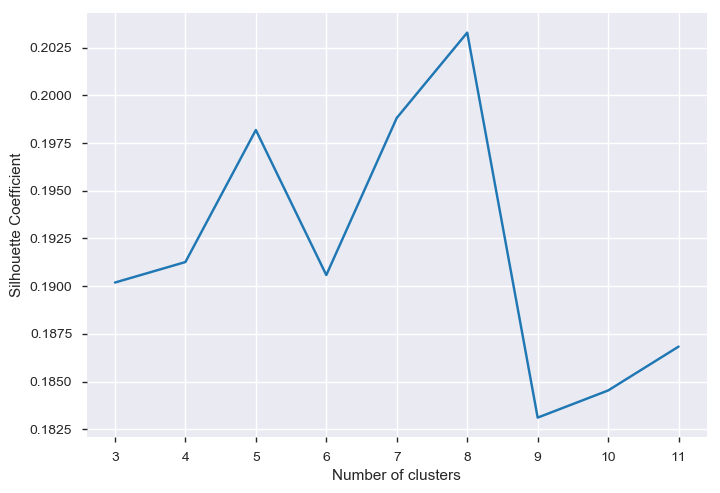

In [68]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)